In [1]:
import pandas as pd
import os
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import platform
plt.style.use('seaborn')

In [2]:
if platform.system() == 'Windows':
    root_dir = 'D:/datasets/KAERI_dataset/'
else:
    root_dir = '/home/bskim/project/kaeri/KAERI_dataset/'

In [37]:
train_f = pd.read_csv(os.path.join(root_dir, 'train_features.csv'))
train_t = pd.read_csv(os.path.join(root_dir, 'train_target.csv'))
test_f = pd.read_csv(os.path.join(root_dir, 'test_features.csv'))

In [38]:
print(np.sort(train_t['X'].unique()))
print(np.sort(train_t['Y'].unique()))
print(np.sort(train_t['M'].unique()))
print(np.sort(train_t['V'].unique()))

[-400. -300. -200. -100.    0.  100.  200.  300.  400.]
[-400. -300. -200. -100.    0.  100.  200.  300.  400.]
[ 25.  50.  75. 100. 125. 150. 175.]
[0.2 0.4 0.6 0.8 1. ]


In [39]:
train_t.groupby(['X','Y'])['id'].count()

X       Y     
-400.0  -400.0    35
        -300.0    35
        -200.0    35
        -100.0    35
         0.0      35
                  ..
 400.0   0.0      35
         100.0    35
         200.0    35
         300.0    35
         400.0    35
Name: id, Length: 80, dtype: int64

In [43]:
select_ids = train_t.loc[(train_t['X'] == 200) & (train_t['Y'] == 200),'id'].values

data = train_f.loc[train_f['id'].isin(select_ids)]
data['Time'] /= 0.000004

data = pd.merge(data, train_t, on = 'id', how = 'left')



c:\users\beomsookim\appdata\local\continuum\anaconda3\envs\sobert\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


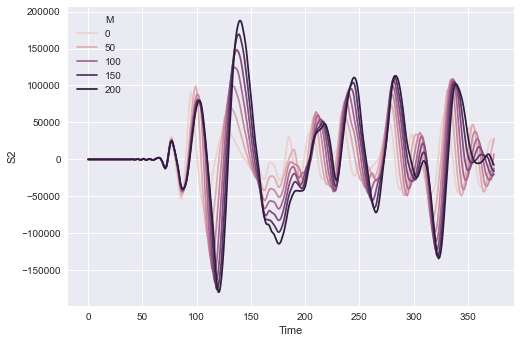

In [44]:
data_sub = data.loc[(data['V'] == 0.2),]
sns.lineplot(x = 'Time', y = 'S2', data = data_sub, hue = 'M')

c:\users\beomsookim\appdata\local\continuum\anaconda3\envs\sobert\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


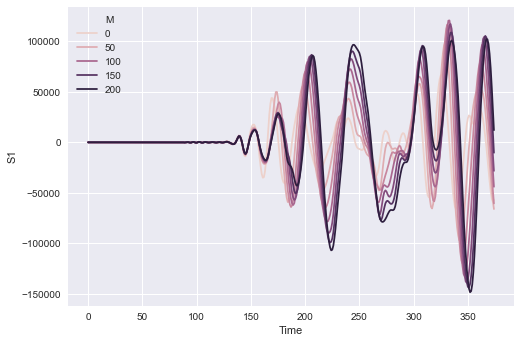

In [41]:
data_sub = data.loc[(data['M'] == 25),]
sns.lineplot(x = 'Time', y = 'S1', data = data_sub, hue = 'M')